# Introduction

In this notebook, we analyse the oracles generated in **feat_br_orc_v2_gen** notebook:
 
 * Feat_BR_volunteers
 * Feat_BR_expert
 * Feat_BR_volunteers_expert_union
 * Feat_BR_volunteers_expert_intersec

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from sklearn.metrics import cohen_kappa_score

from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

from matplotlib import pyplot as plt

In [2]:
feat_br_expert_volunteers_union_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df()
feat_br_expert_volunteers_intersec_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df()
feat_br_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()
feat_br_expert_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_df()
print()

br_2_feature_matrix_final = fd.Feat_BR_Oracles.read_br_2_features_matrix_final_df()
print()

bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

Expert and Volunteers Matrix UNION.shape: (91, 21)
Expert and Volunteers Matrix INTERSEC.shape: (91, 21)
Feat_BR Volunteers Matrix shape: (91, 21)
Feat_BR Expert Matrix shape: (91, 21)

BR_2_Features Matrix Final.shape: (91, 4)

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)


# Cohen's Kappa - Features x Bug Reports Trace Matrix

The Cohen's Kappa Score measures the iter-rater agreement for qualitive answers (categorical items). It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In the section bellow, we calculate the Cohen's kappa with the expert answers and the volunteers answers.

In [3]:
expert_answers = []
volunteers_answers = []

for idx,row in feat_br_volunteers_oracle.iterrows():
    for col in feat_br_volunteers_oracle.columns:
        volunteers_answers.append(feat_br_volunteers_oracle.at[idx,col])
        expert_answers.append(feat_br_expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 1911
Volunteers Answers Length: 1911
Cohen Kappa Score: 0.4137866453981549


We can observe that we have a weak inter-rater agreement level, because the kappa is between 0.40 and 0.59, we have only 15-35% of the data reliable. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900052/)

# Calculate Sparsity

In [4]:
print('feat_br_volunteers_oracle sparsity: {:>40.2%}'.format(aux_functions.calculate_sparsity(feat_br_volunteers_oracle)))
print('feat_br_expert_oracle sparsity: {:>44.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_oracle)))
print()
print('feat_br_expert_volunteers_oracle_union sparsity: {:>27.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_union_oracle)))
print('feat_br_expert_volunteers_oracle_intersec sparsity: {:>24.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_intersec_oracle)))

feat_br_volunteers_oracle sparsity:                                   94.40%
feat_br_expert_oracle sparsity:                                       96.76%

feat_br_expert_volunteers_oracle_union sparsity:                      93.09%
feat_br_expert_volunteers_oracle_intersec sparsity:                   98.06%


# Distribution Amount Features by BRs

[]

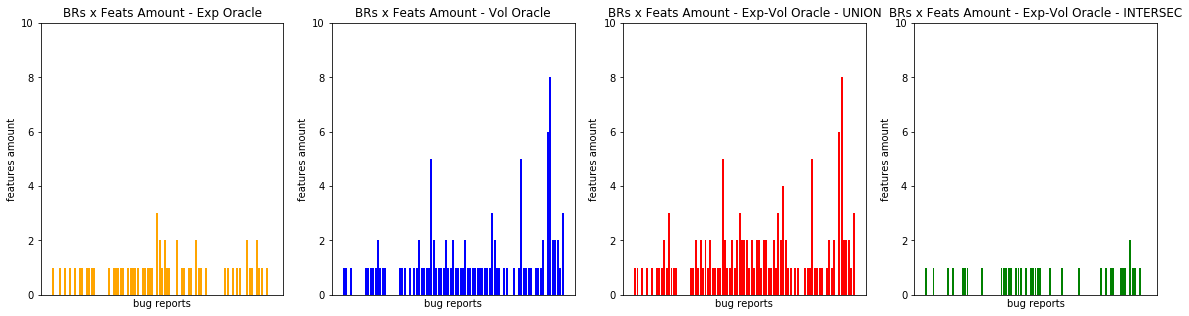

In [5]:
brs_expert = feat_br_expert_oracle.index
feats_amount_expert = feat_br_expert_oracle.apply(lambda row : sum(row.values), axis=1)

brs_vol = feat_br_volunteers_oracle.index
feats_amount_vol = feat_br_volunteers_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_union_oracle.index
feats_amount_exp_vol_union = feat_br_expert_volunteers_union_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_intersec_oracle.index
feats_amount_exp_vol_intersec = feat_br_expert_volunteers_intersec_oracle.apply(lambda row : sum(row.values), axis=1)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

ax1.set_title('BRs x Feats Amount - Exp Oracle')
ax1.bar(x=np.arange(len(feat_br_expert_oracle)), height=feats_amount_expert, color='orange')
ax1.set(xlabel='bug reports', ylabel='features amount')
ax1.set_ylim([0, 10])
ax1.xaxis.set_ticks([])

ax2.set_title('BRs x Feats Amount - Vol Oracle')
ax2.bar(x=np.arange(len(feat_br_volunteers_oracle)), height=feats_amount_vol, color='blue')
ax2.set(xlabel='bug reports', ylabel='features amount')
ax2.set_ylim([0, 10])
ax2.xaxis.set_ticks([])

ax3.set_title('BRs x Feats Amount - Exp-Vol Oracle - UNION')
ax3.bar(x=np.arange(len(feat_br_expert_volunteers_union_oracle)), height=feats_amount_exp_vol_union, color='red')
ax3.set(xlabel='bug reports', ylabel='features amount')
ax3.set_ylim([0, 10])
ax3.xaxis.set_ticks([])

ax4.set_title('BRs x Feats Amount - Exp-Vol Oracle - INTERSEC')
ax4.bar(x=np.arange(len(feat_br_expert_volunteers_intersec_oracle)), height=feats_amount_exp_vol_intersec, color='green')
ax4.set(xlabel='bug reports', ylabel='features amount')
ax4.set_ylim([0, 10])
ax4.xaxis.set_ticks([])

# Analysis of Histograms of Features Amounts

(array([55.,  0.,  0.,  0.,  0., 35.,  0.,  0.,  0.,  1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

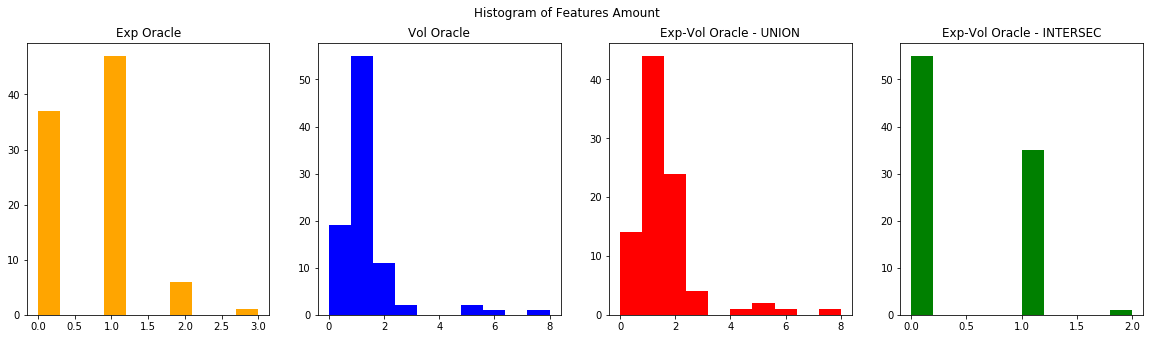

In [6]:
f2, (ax4,ax5,ax6,ax7) = plt.subplots(1, 4, figsize=(20,5))

f2.suptitle(t='Histogram of Features Amount')

ax4.set_title('Exp Oracle')
ax4.hist(feats_amount_expert, color='orange')

ax5.set_title('Vol Oracle')
ax5.hist(feats_amount_vol, color='blue')

ax6.set_title('Exp-Vol Oracle - UNION')
ax6.hist(feats_amount_exp_vol_union, color='red')

ax7.set_title('Exp-Vol Oracle - INTERSEC')
ax7.hist(feats_amount_exp_vol_intersec, color='green')

# Analysis of No Matching Answers

In [7]:
print(br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                                (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m == "")].shape)

no_matching_answers = br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                                                (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m.isin([" ", ""]))][['Features_IDs_exp_m','Features_IDs_vol_m']]

(41, 4)


In [8]:
no_matching_answers.head()

,Features_IDs_exp_m,Features_IDs_vol_m
Bug_Number,,
1248268,,4
1267501,3,
1269485,3,
1271607,,1
1277937,1,20


In [9]:
no_matching_answers['f_names_exp'] = no_matching_answers.Features_IDs_exp_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
no_matching_answers['f_names_vol'] = no_matching_answers.Features_IDs_vol_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
no_matching_answers['bug_title'] = no_matching_answers.apply(lambda row : bugreports[bugreports.Bug_Number == int(row.name)].Summary.values[0], axis=1)
no_matching_answers

,Features_IDs_exp_m,Features_IDs_vol_m,f_names_exp,f_names_vol,bug_title
Bug_Number,,,,,
1248268,,4,[],[[browser_customization]],"Unable to disable ""Recently bookmarked"""
1267501,3,,[[apz_async_scrolling]],[],New Private Browsing start-page overflows off ...
1269485,3,,[[apz_async_scrolling]],[],New Private Browsing start-page has white/gray...
1271607,,1,[],[[new_awesome_bar]],The new window's size is modified if the last ...
1277937,1,20,[[new_awesome_bar]],[[notificationbox]],https has an underline instead of a strikethro...
1278388,,1,[],[[new_awesome_bar]],Permafailing on the change to firefox50: brows...
1279140,1,4 7,[[new_awesome_bar]],"[[browser_customization], [w10_comp]]",awesomebar displaying incorrect text UI for co...
1287687,,3,[],[[apz_async_scrolling]],Syncs happen every 90 seconds when stale devic...
1287748,4,15,[[browser_customization]],[[downloads_dropmaker]],Syncing away from lwtheme updates internal sta...


# Analysis of Answers

In [10]:
br_2_feature_matrix_final['f_names_exp'] = br_2_feature_matrix_final.Features_IDs_exp_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
br_2_feature_matrix_final['f_names_vol'] = br_2_feature_matrix_final.Features_IDs_vol_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
br_2_feature_matrix_final['bug_title'] = br_2_feature_matrix_final.apply(lambda row : bugreports[bugreports.Bug_Number == int(row.name)].Summary.values[0], axis=1)
br_2_feature_matrix_final

,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,f_names_exp,f_names_vol,bug_title
Bug_Number,,,,,,,
1248267,6,6,6,6,[[context_menu]],[[context_menu]],"Right click on bookmark item of ""Recently Book..."
1248268,,4,4,,[],[[browser_customization]],"Unable to disable ""Recently bookmarked"""
1257087,,,,,[],[],Middle mouse click on history item would not open
1264988,1,1,1,1,[[new_awesome_bar]],[[new_awesome_bar]],Scrollbar appears for a moment in the new Awes...
1267480,,,,,[],[],Intermittent browser/components/preferences/in...
1267501,3,,3,,[[apz_async_scrolling]],[],New Private Browsing start-page overflows off ...
1269348,,,,,[],[],Show last sync date tooltip on Synced Tabs sid...
1269485,3,,3,,[[apz_async_scrolling]],[],New Private Browsing start-page has white/gray...
1270274,,,,,[],[],Intermittent browser_share.jsuncaught exceptio...
